<a href="https://colab.research.google.com/github/hahahonline/web_scraping/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O quê é Web scraping? 

 É uma técnica de coleta automatizada de dados de sites da web. Envolve a extração de informações de páginas da web por meio de programação e a transformação desses dados em um formato estruturado e utilizável.

In [ ]:
#Execute isso apenas na primeira vez de cada uso. 
!pip install -q spacy==2.2.3
!python3 -m spacy download pt

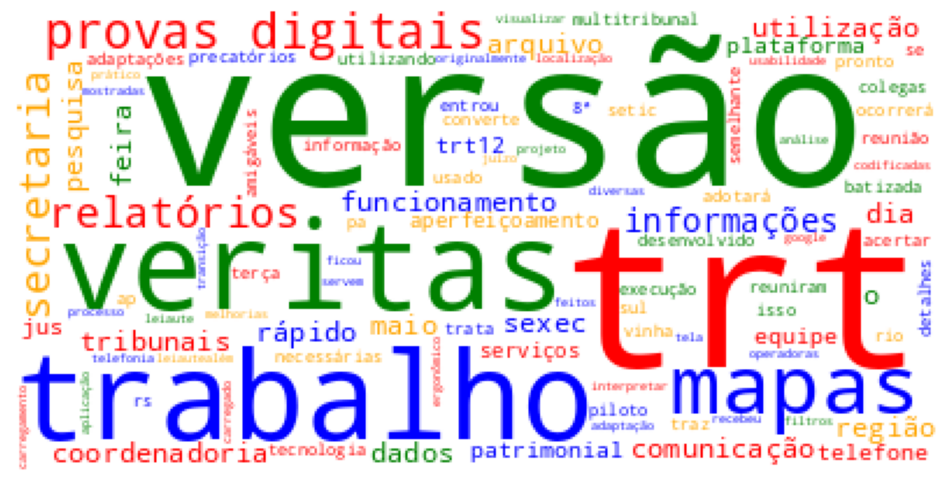

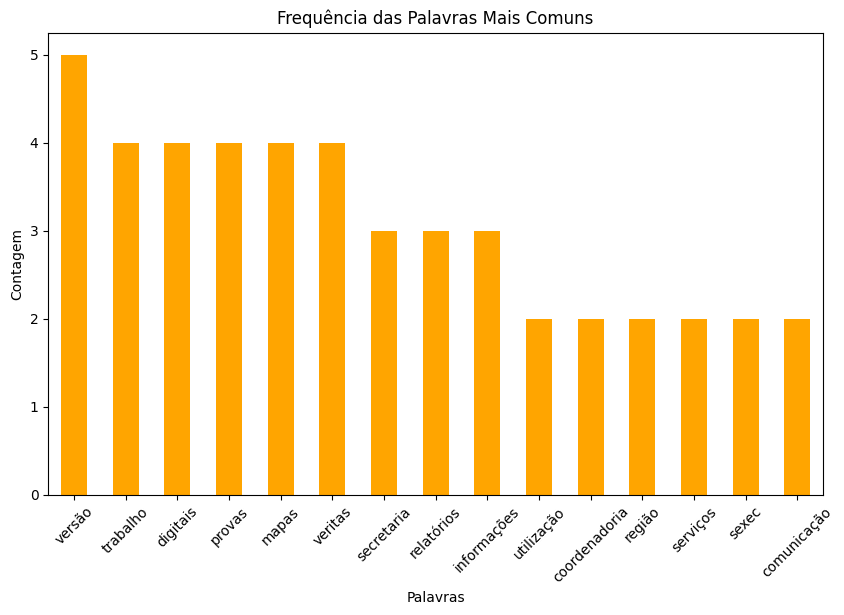

Tabela de Frequência das Palavras Mais Comuns:

          Palavra  Contagem
0          versão         5
1        trabalho         4
2        digitais         4
3          provas         4
4           mapas         4
5         veritas         4
6      secretaria         3
7      relatórios         3
8     informações         3
9      utilização         2
10  coordenadoria         2
11         região         2
12       serviços         2
13          sexec         2
14    comunicação         2


In [71]:
import bs4 as bs
import urllib.request
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import pandas as pd
import string
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

#Adicione o site aqui
site = "https://portal.trt12.jus.br/noticias/plataforma-do-trt-12-que-decodifica-provas-digitais-ja-pode-ser-utilizada-por-outros"




dados = urllib.request.urlopen(site)
dados = dados.read()
dados_html = bs.BeautifulSoup(dados, 'lxml')
paragrafos = dados_html.find_all('p')
conteudo = ''
for p in paragrafos:
    conteudo += p.text

conteudo = conteudo.lower()

pln = spacy.load("pt_core_news_sm")
doc = pln(conteudo)
lista_token = []
for token in doc:
    if token.text.strip() != '' and not token.is_punct and not token.is_space and not token.is_digit:
        lista_token.append(token.text)
sem_stop = []
for palavra in lista_token:
    if pln.vocab[palavra].is_stop == False:
        sem_stop.append(palavra)

# Digite aqui as palavras nas quais você quer desconsiderar
palavras_excluidas = ['será']
palavras_excluidas = [palavra.lower() for palavra in palavras_excluidas]

sem_stop_filtradas = [palavra for palavra in sem_stop if palavra not in palavras_excluidas]


#Visualizações de dados: 


#WorkCloud
color_map = ListedColormap(['orange', 'green', 'red', 'blue'])
cloud = WordCloud(background_color = 'white', max_words = 100, colormap=color_map)


cloud = cloud.generate(' '.join(sem_stop_filtradas))
plt.figure(figsize=(12,12))
plt.imshow(cloud)
plt.axis('off')
plt.show()
print()
print()

# Gráfico de barras
frequencia = pd.Series(sem_stop_filtradas).value_counts().head(15)
plt.figure(figsize=(10, 6))
frequencia.plot(kind='bar', color='orange')
plt.title('Frequência das Palavras Mais Comuns')
plt.xlabel('Palavras')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Tabela de frequência
tabela_frequencia = pd.Series(sem_stop_filtradas).value_counts().reset_index()
tabela_frequencia.columns = ['Palavra', 'Contagem']
tabela_frequencia = tabela_frequencia[~tabela_frequencia['Palavra'].str.contains(r'[^\w\s]')]
tabela_frequencia = tabela_frequencia[~tabela_frequencia['Palavra'].str.isnumeric()]
tabela_frequencia = tabela_frequencia[tabela_frequencia['Palavra'].str.strip() != '']
print('Tabela de Frequência das Palavras Mais Comuns:\n')
print(tabela_frequencia.head(15))
